# Pre **Code** 

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark import SparkContext, SparkConf
spark = SparkSession.builder.getOrCreate()

import json
import pyspark.sql.functions as F
import pyspark.sql.types as T
from datetime import datetime,timedelta,date
from pyspark import SparkContext
import ast
from pyspark.sql import Window
import seaborn as sns

In [ ]:
data_location = pd.read_csv('/content/SERS_train.csv')
data = pd.DataFrame(data_location)

test =data.dropna()
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[1]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()
df_train = spark.createDataFrame(test) 
df_train.show(10,False)

+-------+--------+--------+---------------------+------+-------------+------------------+------+----------+----------+---------+----------+------------------+
|edge_id|length  |way_type|way_name             |eta   |timestamp    |coverage          |ata   |latitude  |longitude |is_tunnel|user_group|way_segments_count|
+-------+--------+--------+---------------------+------+-------------+------------------+------+----------+----------+---------+----------+------------------+
|165    |36.713  |7       |توحیدی               |13.007|1641423595457|1.1149456595756022|7.475 |35.768834 |51.4694875|0.0      |B         |1                 |
|286    |68.373  |7       |بوستان               |9.116 |1641188168444|0.9988050838781368|9.999 |35.8001555|51.4748499|0.0      |A         |1                 |
|455    |76.896  |7       |آذر                  |6.291 |1642397104643|0.9697557740324592|7.004 |32.645556 |51.6593476|0.0      |A         |3                 |
|455    |76.896  |7       |آذر                

In [ ]:
data_location = pd.read_csv('/content/SERS_test.csv')
data = pd.DataFrame(data_location)

test =data.dropna()
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[1]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()
df_test = spark.createDataFrame(test) 
df_test.show(10,False)

+-------+-------+--------+--------------------------+------+-------------+------------------+----------+----------+---------+----------+------------------+
|edge_id|length |way_type|way_name                  |eta   |timestamp    |coverage          |latitude  |longitude |is_tunnel|user_group|way_segments_count|
+-------+-------+--------+--------------------------+------+-------------+------------------+----------+----------+---------+----------+------------------+
|90     |56.217 |10      |بزرگراه هاشمی رفسنجانی غرب|8.432 |1642941195020|0.9731913833893672|35.7709389|51.3405864|0        |A         |2                 |
|152    |87.744 |8       |نسترن شرقی                |18.281|1642844765725|0.8553268599562364|35.7403673|51.4354609|0        |A         |3                 |
|239    |68.373 |8       |بوستان                    |6.837 |1643355443479|0.933504307255788 |35.8001555|51.4748499|0        |A         |4                 |
|277    |172.926|6       |زارع                      |38.938|1642

# **Insight**

In [ ]:
df_train.count()

161573

In [ ]:
df_test.count()

70739

In [ ]:
df_train.groupBy('edge_id').agg(F.count(F.lit(1)).alias('count')).groupBy('count').agg(F.count(F.lit(1))).orderBy('count').show(100,False)

+-----+--------+
|count|count(1)|
+-----+--------+
|1    |83453   |
|2    |23428   |
|3    |6679    |
|4    |1837    |
|5    |448     |
|6    |120     |
|7    |53      |
|8    |22      |
|9    |5       |
|10   |6       |
|11   |1       |
|12   |3       |
|13   |1       |
|14   |1       |
|16   |1       |
|17   |1       |
|19   |3       |
|20   |2       |
|30   |1       |
|33   |1       |
+-----+--------+



In [ ]:
(
    df_train.groupBy('way_type')
            .agg(F.count(F.lit(1)).alias('count'))
            .withColumn('share',F.round(100*(F.col('count')/(F.sum('count').over(Window.partitionBy()))),2))
            .orderBy('way_type')
            .show()
)

+--------+-----+-----+
|way_type|count|share|
+--------+-----+-----+
|       0|    2|  0.0|
|       1|  989| 0.61|
|       2|  145| 0.09|
|       3|45758|28.32|
|       4|  603| 0.37|
|       5|  198| 0.12|
|       6|24041|14.88|
|       7|68366|42.31|
|       8|    4|  0.0|
|       9|20561|12.73|
|      10|  906| 0.56|
+--------+-----+-----+



In [ ]:
(
    df_train.groupBy('is_tunnel')
            .agg(F.count(F.lit(1)).alias('count'))
            .withColumn('share',F.round(100*(F.col('count')/(F.sum('count').over(Window.partitionBy()))),2))
            .orderBy('is_tunnel')
            .show()
)

+---------+------+-----+
|is_tunnel| count|share|
+---------+------+-----+
|      0.0|161542|99.98|
|      1.0|    31| 0.02|
+---------+------+-----+



In [ ]:
(
    df_train.filter(F.col('is_tunnel')==1)
            .withColumn('speed',F.col('length')/F.col('ata')*3.6)
            .drop('latitude','longitude','user_group','is_tunnel','timestamp')
).show(31,False)

+-------+----------+--------+-----------------------+------+------------------+------+------------------+------------------+
|edge_id|length    |way_type|way_name               |eta   |coverage          |ata   |way_segments_count|speed             |
+-------+----------+--------+-----------------------+------+------------------+------+------------------+------------------+
|38510  |342.083   |3       |دانشگاه                |22.805|0.98516675777516  |39.993|1                 |30.792858750281304|
|61610  |429.256   |9       |جاده حمیل - شباب       |21.168|0.9743369923775044|25.52 |1                 |60.55335423197492 |
|25987  |114.684   |9       |جاده فیروزآباد - کوار  |9.553 |0.9013899061769732|6.501 |2                 |63.50752191970465 |
|108233 |90.623    |9       |جاده یاسوج - بابامیدان |5.178 |0.8786290456066419|4.504 |1                 |72.4340142095915  |
|102376 |167.351   |9       |جاده قائمشهر - سوادکوه |8.731 |0.9038487968401648|9.489 |1                 |63.490736642428075|


In [ ]:
df_cleaned = (
    df_train.withColumn('speed',F.col('length')/F.col('ata')*3.6)
            .withColumn('createdAt',F.from_unixtime(F.col('timestamp')/1000))
            .withColumn('timeOfDay',F.hour('createdAt')+F.round(F.minute('createdAt')/60,2))
            .withColumn('dayOfWeek',F.dayofweek('createdAt'))
            .withColumn('target',F.col('eta')/F.col('ata'))
            .withColumn('isInTehran',((F.col('latitude').between(35.58,35.85)) & (F.col('longitude').between(51.1,51.6))).cast('integer'))
            .withColumn('targetError',F.abs(100*((F.col('eta')-F.col('ata'))/F.col('ata'))))
).persist()

In [ ]:
(
    df_cleaned.groupBy('way_segments_count')
              .agg(F.round(F.mean('targetError'),2).alias('error rate'))
              .orderBy('way_segments_count')
).show(100,False)

+------------------+----------+
|way_segments_count|error rate|
+------------------+----------+
|1                 |35.27     |
|2                 |35.27     |
|3                 |35.94     |
|4                 |35.37     |
+------------------+----------+



In [ ]:
(
    df_cleaned.groupBy('isInTehran')
              .agg(F.round(F.mean('targetError'),2).alias('error rate'))
              .orderBy('isInTehran')
).show(100,False)

+----------+----------+
|isInTehran|error rate|
+----------+----------+
|0         |33.48     |
|1         |41.01     |
+----------+----------+



In [ ]:
(
    df_cleaned.groupBy('way_type')
              .agg(F.round(F.mean('targetError'),2).alias('error rate'))
              .orderBy('way_type')
).show(100,False)

+--------+----------+
|way_type|error rate|
+--------+----------+
|0       |72.11     |
|1       |17.94     |
|2       |34.23     |
|3       |33.85     |
|4       |44.96     |
|5       |35.74     |
|6       |43.52     |
|7       |37.75     |
|8       |56.91     |
|9       |22.06     |
|10      |36.59     |
+--------+----------+



In [ ]:
df_coverage = (
    df_cleaned.withColumn('coverageBucket',F.round(0.01*F.round(F.col('coverage')/0.01),2))
              .groupBy('coverageBucket')
              .agg(F.round(F.mean('targetError'),2).alias('error rate'))
              .orderBy('coverageBucket')
)

df_coverage.show(100,False)

+--------------+----------+
|coverageBucket|error rate|
+--------------+----------+
|0.8           |62.19     |
|0.81          |59.27     |
|0.82          |57.63     |
|0.83          |54.53     |
|0.84          |52.4      |
|0.85          |51.37     |
|0.86          |46.22     |
|0.87          |44.62     |
|0.88          |41.94     |
|0.89          |40.87     |
|0.9           |37.03     |
|0.91          |35.61     |
|0.92          |33.94     |
|0.93          |32.27     |
|0.94          |30.82     |
|0.95          |29.03     |
|0.96          |27.05     |
|0.97          |25.82     |
|0.98          |24.51     |
|0.99          |22.3      |
|1.0           |26.11     |
|1.01          |30.87     |
|1.02          |34.99     |
|1.03          |36.89     |
|1.04          |35.26     |
|1.05          |36.13     |
|1.06          |38.61     |
|1.07          |38.26     |
|1.08          |40.25     |
|1.09          |40.19     |
|1.1           |40.18     |
|1.11          |47.3      |
|1.12          |45.3

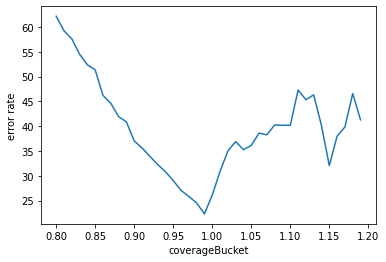

In [ ]:
coverage_plot = df_coverage.toPandas()
sns.lineplot(data = coverage_plot[coverage_plot['coverageBucket']<1.2
                                ] , x='coverageBucket',y='error rate' )

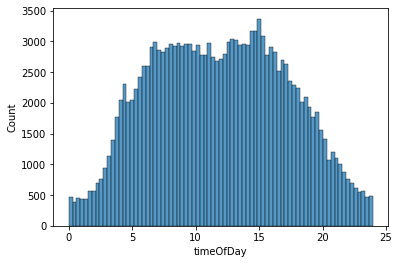

In [ ]:
hist_plot = df_cleaned.toPandas()



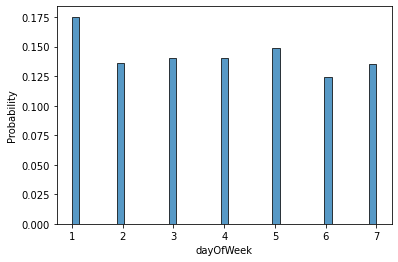

In [ ]:
sns.histplot(data=hist_plot,x='dayOfWeek',stat='probability')

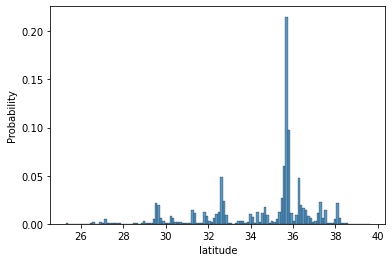

In [ ]:
sns.histplot(data=hist_plot,x='latitude',stat='probability')

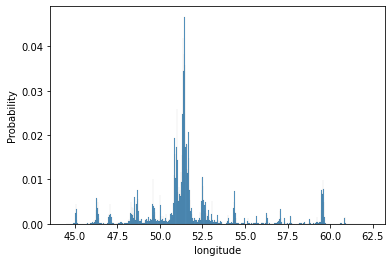

In [ ]:
sns.histplot(data=hist_plot,x='longitude',stat='probability')

In [ ]:
df_length = (
    df_cleaned.withColumn('lengthBucket',F.round(10*F.round(F.col('length')/10),0))
              .groupBy('lengthBucket')
              .agg(F.round(F.mean('targetError'),2).alias('error rate'))
              .orderBy('lengthBucket')
)

df_length.show(100,False)

+------------+----------+
|lengthBucket|error rate|
+------------+----------+
|0.0         |24.95     |
|10.0        |65.83     |
|20.0        |49.24     |
|30.0        |43.73     |
|40.0        |43.05     |
|50.0        |40.87     |
|60.0        |41.76     |
|70.0        |40.32     |
|80.0        |40.21     |
|90.0        |40.02     |
|100.0       |38.84     |
|110.0       |36.84     |
|120.0       |35.73     |
|130.0       |34.32     |
|140.0       |34.29     |
|150.0       |32.3      |
|160.0       |31.51     |
|170.0       |31.15     |
|180.0       |29.0      |
|190.0       |29.03     |
|200.0       |28.63     |
|210.0       |28.85     |
|220.0       |27.89     |
|230.0       |27.05     |
|240.0       |25.26     |
|250.0       |25.77     |
|260.0       |25.9      |
|270.0       |24.73     |
|280.0       |23.82     |
|290.0       |22.89     |
|300.0       |22.34     |
|310.0       |22.06     |
|320.0       |22.37     |
|330.0       |21.89     |
|340.0       |22.01     |
|350.0      

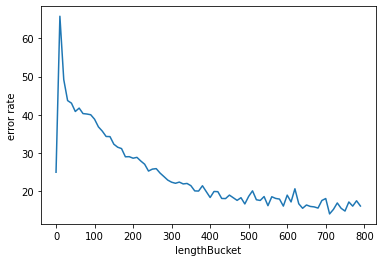

In [ ]:
length_plot = df_length.toPandas()
sns.lineplot(data = length_plot[length_plot['lengthBucket']<800
                                ] , x='lengthBucket',y='error rate' )

In [ ]:
insight = (
    df_cleaned.select('length','coverage','speed','way_segments_count','target','targetError')
).toPandas()

insight.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,length,coverage,speed,way_segments_count,target,targetError
count,161573.000000,161573.000000,161573.000000,161573.000000,161573.000000,161573.000000
mean,200.856106,0.931024,37.365013,1.908902,1.066850,35.402148
std,551.003186,0.173169,22.713836,0.996361,1.418421,43.509038
min,3.791000,0.800002,0.150230,1.000000,0.030222,0.000000
1%,24.555000,0.804690,4.033068,1.000000,0.324406,0.366871
5%,34.891600,0.822583,10.341573,1.000000,0.457484,1.892926
10%,42.248400,0.841124,14.468336,1.000000,0.562405,3.803060
25%,57.671000,0.884538,21.942444,1.000000,0.749099,9.720885
50%,92.006000,0.931879,32.293525,2.000000,0.925015,21.818454
75%,169.973000,0.966720,46.783901,3.000000,1.131262,43.947263


In [ ]:
(
    df_cleaned.filter(F.col('speed')<=150)
              .filter(F.col('coverage').between(0.85,1.05))
              .filter(F.col('is_tunnel')==0)
              .filter(F.col('length')<=2500)
              #.filter(F.col('way_type').isin([3,6,7,9]))
              #.filter(F.col('way_type')==6)
              .agg(F.round(F.mean('targetError'),2).alias('error rate'))
).show()

+----------+
|error rate|
+----------+
|     32.38|
+----------+



In [ ]:
df_features = (
    df_cleaned.filter(F.col('speed')<=150)
              .filter(F.col('coverage').between(0.85,1.05))
              .filter(F.col('is_tunnel')==0)
              #.filter(F.col('way_type')==6)
              .select('length','eta','coverage','way_segments_count','way_type','latitude','longitude','timeOfDay','dayOfWeek','target','ata','isInTehran')
)

df_features.show(20,False)
df_features.count()

+--------+------+------------------+------------------+--------+----------+----------+---------+---------+-------------------+------+----------+
|length  |eta   |coverage          |way_segments_count|way_type|latitude  |longitude |timeOfDay|dayOfWeek|target             |ata   |isInTehran|
+--------+------+------------------+------------------+--------+----------+----------+---------+---------+-------------------+------+----------+
|68.373  |9.116 |0.9988050838781368|1                 |7       |35.8001555|51.4748499|5.6      |2        |0.9116911691169116 |9.999 |1         |
|76.896  |6.291 |0.9697557740324592|3                 |7       |32.645556 |51.6593476|5.42     |2        |0.8982010279840092 |7.004 |0         |
|76.896  |6.291 |0.8830849459009574|1                 |7       |32.645556 |51.6593476|12.08    |7        |0.967995076165564  |6.499 |0         |
|869.709 |38.182|0.9694518511364142|2                 |9       |32.9273571|51.5172039|11.82    |4        |1.193784392196098  |31.9

138358

In [ ]:
test_cleaned = (
    df_test.withColumn('createdAt',F.from_unixtime(F.col('timestamp')/1000))
            .withColumn('timeOfDay',F.hour('createdAt')+F.round(F.minute('createdAt')/60,2))
            .withColumn('dayOfWeek',F.dayofweek('createdAt'))
            .select('length','eta','latitude','longitude','timeOfDay','coverage','way_type','dayOfWeek','is_tunnel','way_segments_count')
).persist()

features_test = test_cleaned.toPandas()


In [ ]:
(
    test_cleaned.groupBy('is_tunnel')
            .agg(F.count(F.lit(1)).alias('count'))
            .withColumn('share',F.round(100*(F.col('count')/(F.sum('count').over(Window.partitionBy()))),2))
            .orderBy('is_tunnel')
            .show()
)

+---------+-----+-----+
|is_tunnel|count|share|
+---------+-----+-----+
|        0|70729|99.99|
|        1|   10| 0.01|
+---------+-----+-----+



In [ ]:
(
    test_cleaned.groupBy('way_type')
            .agg(F.count(F.lit(1)).alias('count'))
            .withColumn('share',F.round(100*(F.col('count')/(F.sum('count').over(Window.partitionBy()))),2))
            .orderBy('way_type')
            .show()
)

+--------+-----+-----+
|way_type|count|share|
+--------+-----+-----+
|       0|    6| 0.01|
|       1|  494|  0.7|
|       2|   49| 0.07|
|       3|20499|28.98|
|       4|  261| 0.37|
|       5|   97| 0.14|
|       6|10260| 14.5|
|       7|    3|  0.0|
|       8|28723| 40.6|
|       9|    2|  0.0|
|      10| 9954|14.07|
|      11|  391| 0.55|
+--------+-----+-----+



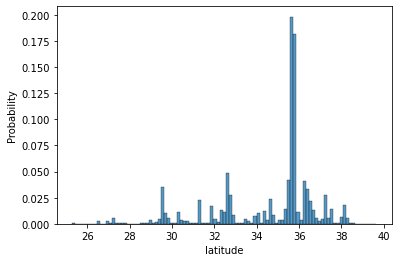

In [ ]:
test_plot = test_cleaned.toPandas()
sns.histplot(data=test_plot,x='latitude',stat='probability')

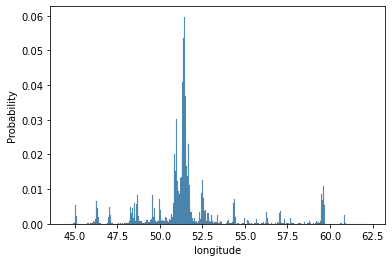

In [ ]:
sns.histplot(data=test_plot,x='longitude',stat='probability')

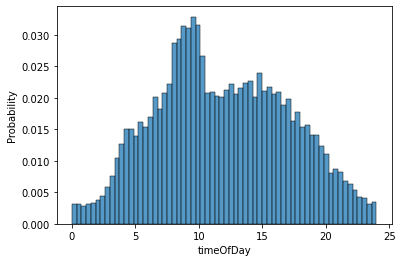

In [ ]:
sns.histplot(data=test_plot,x='timeOfDay',stat='probability')

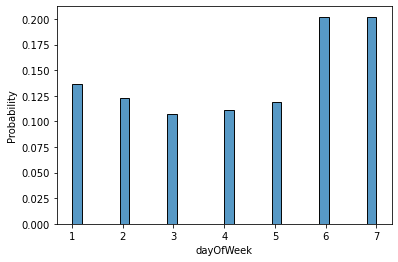

In [ ]:
sns.histplot(data=test_plot,x='dayOfWeek',stat='probability')

(0.0, 2000.0)

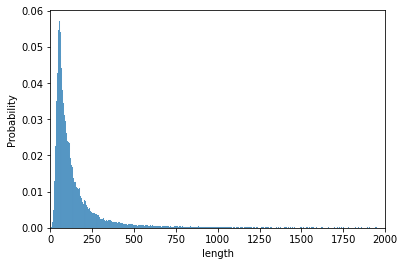

In [ ]:
sns.histplot(data=test_plot,x='length',stat='probability')
plt.xlim([0,2000])

In [ ]:
# Data
features_train = df_features.toPandas()
features_test = test_cleaned.toPandas()

#X = ['length','eta','coverage','way_segments_count','latitude','longitude','timeOfDay','dayOfWeek','way_type']

Train_Fetures = features_train[['length','eta','latitude','longitude','timeOfDay','coverage','way_type','dayOfWeek']]
Train_Target = features_train[['target','ata']]


# **ML Model**

XGBosst [Source](https://xgboost.readthedocs.io/en/stable/parameter.html)

[Package](https://xgboost.readthedocs.io/en/stable/python/python_api.html)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Data
features_train = df_features.toPandas()
features_test = test_cleaned.toPandas()

#X = ['length','eta','coverage','way_segments_count','latitude','longitude','timeOfDay','dayOfWeek','way_type']

Train_Fetures = features_train[['length','eta','latitude','longitude','timeOfDay','coverage','way_type','dayOfWeek']]
Train_Target = features_train[['target','ata']]

Test_Features = features_test

# Fit
train_X, test_X, train_y, test_y = train_test_split(Train_Fetures, Train_Target, test_size=0.1)

model = xgb.XGBRegressor(learing_rate = 0.2,
                         max_depth=10,
                         n_estimators=200,
                         min_child_weight=3,
                         eval_metric='mae')

eval_set = [(train_X, train_y['target']), (test_X, test_y['target'])]
model.fit(train_X, (train_y['target']).values.ravel(), early_stopping_rounds=25, eval_metric=["mae"], eval_set=eval_set, verbose=True)

# Predcition
y_predicted =  model.predict(test_X)
prediction = test_X[['eta','coverage']]
prediction['predicted ATA'] = (prediction['eta']) / y_predicted
prediction['ata'] = test_y['ata']

prediction['error'] = abs((prediction['predicted ATA']-prediction['ata'])/(prediction['ata']))* 100
prediction['target error'] = prediction['predicted ATA']/prediction['ata']
prediction['first error'] = prediction['eta']/prediction['ata']
prediction['error'].describe()

[11:24:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:0.594191	validation_1-mae:0.595572
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 25 rounds.
[1]	validation_0-mae:0.542994	validation_1-mae:0.545161
[2]	validation_0-mae:0.498434	validation_1-mae:0.501432
[3]	validation_0-mae:0.459777	validation_1-mae:0.463599
[4]	validation_0-mae:0.426423	validation_1-mae:0.430932
[5]	validation_0-mae:0.397747	validation_1-mae:0.403246
[6]	validation_0-mae:0.373215	validation_1-mae:0.379645
[7]	validation_0-mae:0.3524	validation_1-mae:0.359729
[8]	validation_0-mae:0.334805	validation_1-mae:0.343151
[9]	validation_0-mae:0.320023	validation_1-mae:0.32942
[10]	validation_0-mae:0.30763	validation_1-mae:0.317893
[11]	validation_0-mae:0.29722	validation_1-mae:0.308466
[12]	validation_0-mae:0.288453	validation_1-mae

count    13836.000000
mean        22.339463
std         20.598296
min          0.002031
25%          7.749994
50%         16.804079
75%         30.777931
max        404.329001
Name: error, dtype: float64

Text(0.5, 0, 'target: ETA/ATA')

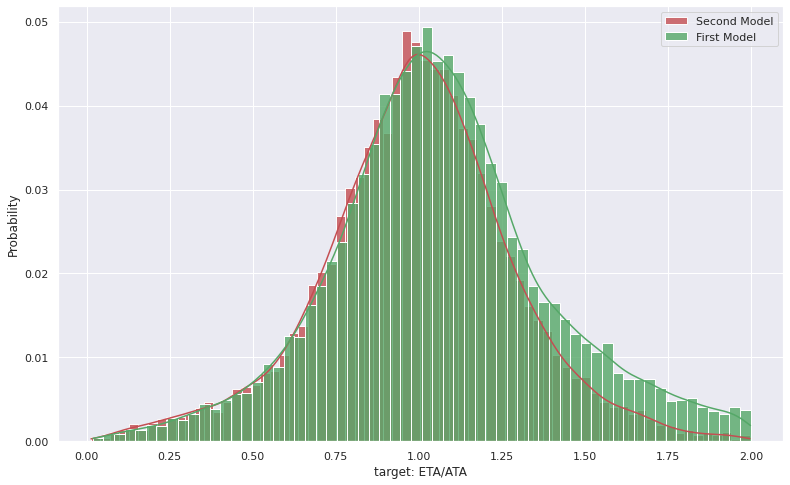

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(13,8)})
sns.histplot(data = prediction[prediction['target error']<2], x= 'target error',stat='probability',alpha=0.8,color='r',kde=True,label='Second Model')
sns.histplot(data = prediction[prediction['first error']<2], x= 'first error',stat='probability',alpha=0.8,color='g',kde=True,label='First Model')
plt.legend()
plt.xlabel('target: ETA/ATA')

# **Hyperparametring** [Source](https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook)

In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error


space={'max_depth': hp.quniform("max_depth", 3, 14, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.quniform("n_estimators", 200, 350, 30)
    }

Train_Fetures = features_train[['length','eta','latitude','longitude','timeOfDay','coverage','way_type','dayOfWeek']]
Train_Target = features_train[['target','ata']]
train_X, test_X, train_y, test_y = train_test_split(Train_Fetures, Train_Target, test_size=0.1)

def objective(space):
    clf=xgb.XGBRegressor(
                    n_estimators =int(space['n_estimators']), max_depth = int(space['max_depth']),min_child_weight=int(space['min_child_weight'])
                    ,eval_metric='mae',eta=0.2)
    
    eval_set = [(train_X, train_y['target']), (test_X, test_y['target'])]
    clf.fit(train_X, (train_y['target']).values.ravel(), early_stopping_rounds=15, eval_metric=["mae"], eval_set=eval_set,verbose=False)
  
    pred = clf.predict(test_X)
    mea = mean_absolute_error(pred, test_y['target'])
    print ("MAE:", mea)
    return {'loss': mea, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 40,
                        trials = trials)



[11:29:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE:
0.26449928737635353
[11:30:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE:
0.2663215546124728
[11:31:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE:
0.27014631040890164
[11:31:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE:
0.2637660832650818
[11:32:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE:
0.2666492150362328
[11:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE:
0.2660448458139034
[11:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprec

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'max_depth': 8.0, 'min_child_weight': 0.0, 'n_estimators': 270.0}


**Choosing Model**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Fit
train_X, test_X, train_y, test_y = train_test_split(Train_Fetures, Train_Target, test_size=0.1)

# Parameters
bestModel = xgb.XGBRegressor(eta = 0.2,
                         max_depth=8,
                         n_estimators=270,
                         min_child_weight=0,
                         eval_metric='mae')

eval_set = [(train_X, train_y['target']), (test_X, test_y['target'])]
bestModel.fit(train_X, (train_y['target']).values.ravel(), early_stopping_rounds=25, eval_metric=["mae"], eval_set=eval_set, verbose=True)

[14:14:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:0.59373	validation_1-mae:0.600692
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 25 rounds.
[1]	validation_0-mae:0.542827	validation_1-mae:0.549948
[2]	validation_0-mae:0.498648	validation_1-mae:0.505914
[3]	validation_0-mae:0.460483	validation_1-mae:0.467956
[4]	validation_0-mae:0.427716	validation_1-mae:0.435376
[5]	validation_0-mae:0.399714	validation_1-mae:0.407632
[6]	validation_0-mae:0.376002	validation_1-mae:0.383979
[7]	validation_0-mae:0.356029	validation_1-mae:0.363956
[8]	validation_0-mae:0.339292	validation_1-mae:0.347168
[9]	validation_0-mae:0.325332	validation_1-mae:0.333278
[10]	validation_0-mae:0.313724	validation_1-mae:0.321751
[11]	validation_0-mae:0.304014	validation_1-mae:0.312259
[12]	validation_0-mae:0.296002	validation_1

XGBRegressor(eta=0.2, eval_metric='mae', max_depth=8, min_child_weight=0,
             n_estimators=270)

In [ ]:
# Predcition
y_predicted =  bestModel.predict(test_X)
prediction = test_X[['eta','coverage']]
prediction['predicted ATA'] = (prediction['eta']) / y_predicted
prediction['ata'] = test_y['ata']

prediction['error'] = abs((prediction['predicted ATA']-prediction['ata'])/(prediction['ata']))* 100
prediction['first error'] = prediction['eta']/prediction['ata']
prediction['target error'] = prediction['predicted ATA']/prediction['ata']

prediction['error'].describe()

count    13836.000000
mean        22.191274
std         19.986286
min          0.003731
25%          7.828691
50%         16.832831
75%         30.481348
max        264.019495
Name: error, dtype: float64

Text(0.5, 1.0, 'Error Distribution')

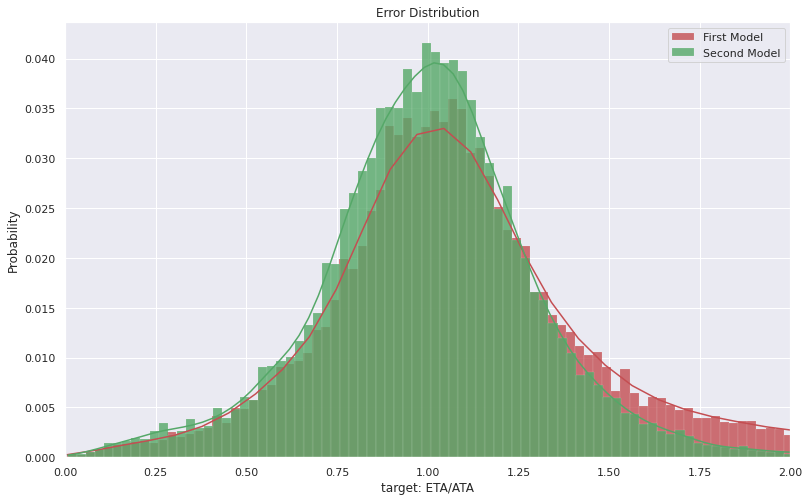

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(13,8)})
sns.histplot(data = prediction, x= 'first error',stat='probability',alpha=0.8,color='r',kde=True,label='First Model',binwidth=0.025)

sns.histplot(data = prediction, x= 'target error',stat='probability',alpha=0.8,color='g',kde=True,label='Second Model',binwidth=0.025)
plt.legend()
plt.xlim([0,2])
plt.xlabel('target: ETA/ATA')
plt.title('Error Distribution')

Test Data Prediction

In [ ]:

y_test_predicted = bestModel.predict(features_test)
y_test_final_prediction = features_test['eta']/y_test_predicted
y_test_final_prediction
np.savetxt("prediction.csv", np.array(y_test_final_prediction), delimiter=",")


In [ ]:
prediction.head(10)

,eta,coverage,predicted ATA,ata,error,first error,target error
84957,7.086,0.868339,6.288135,5.000,25.762698,1.417200,1.257627
55733,4.551,0.906148,5.565920,5.003,11.251645,0.909654,1.112516
79264,23.566,0.991167,17.055538,23.006,25.864825,1.024341,0.741352
6120,49.630,0.997534,45.746548,39.492,15.837506,1.256710,1.158375
80472,42.968,0.995139,40.196125,38.991,3.090778,1.101998,1.030908
108015,10.028,0.915452,8.568072,46.001,81.374162,0.217995,0.186258
116989,22.235,0.949693,21.458293,20.007,7.253927,1.111361,1.072539
86709,7.495,0.867817,6.892591,9.996,31.046508,0.749800,0.689535
66844,15.030,0.970077,15.089292,18.512,18.489134,0.811906,0.815109
54623,19.196,0.954958,17.139928,21.506,20.301647,0.892588,0.796984


# **Model Explanation**

Shap Value [Source](https://www.kaggle.com/code/bryanb/xgboost-explainability-with-shap/notebook):

In [ ]:
Xd = test_X[['length','eta','latitude','longitude','timeOfDay','coverage','way_type','dayOfWeek']]
Xd['target'] = test_y['target']

In [ ]:
test_X

,length,eta,latitude,longitude,timeOfDay,coverage,way_type,dayOfWeek
84957,96.457,7.086,32.350505,50.856205,4.30,0.868339,3,7
55733,22.755,4.551,35.689070,51.443260,9.08,0.906148,7,6
79264,130.924,23.566,29.607529,52.559759,8.77,0.991167,10,4
6120,272.364,49.630,35.721301,51.361450,9.12,0.997534,7,2
80472,249.783,42.968,35.816026,50.935961,8.58,0.995139,3,3
...,...,...,...,...,...,...,...,...
95460,72.493,7.908,35.692107,51.259283,5.02,0.889202,3,5
44115,63.036,7.564,36.364947,59.473256,7.07,0.920899,6,4
96327,173.107,15.579,36.300866,49.995521,4.82,0.975855,7,1
16034,38.530,5.334,32.685234,51.528375,8.77,0.938290,7,7


In [ ]:
!pip install shap 

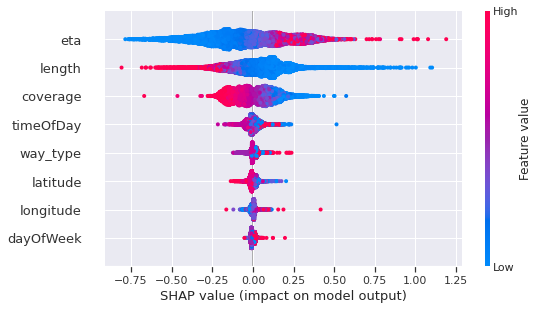

In [ ]:
import shap
X_sampled = test_X
explainer = shap.TreeExplainer(bestModel)
shap_values = explainer.shap_values(X_sampled)
shap.summary_plot(shap_values, X_sampled)


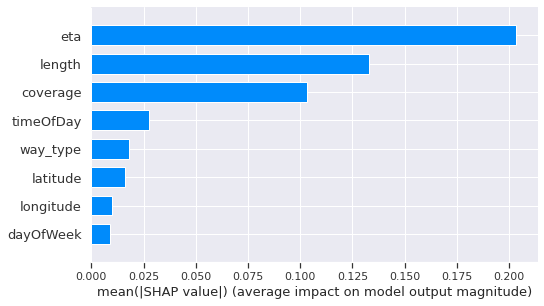

In [ ]:
shap.summary_plot(shap_values, X_sampled, plot_type="bar")